## *santoshhulbutti@gmail.com | DataTrained | Practice Project # 02

## *World Happiness Prediction Project*
### Problem Statement: to predict the happiness score considering all the other factors mentioned in the dataset. 

In [1]:
url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv"

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


from sklearn.preprocessing import PowerTransformer, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
df0 = pd.read_csv(url)
df0.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
1.39651+1.34951+0.94143+0.66557+0.41978+0.29678+2.51738

7.58696

In [5]:
df0.describe(include = 'all')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158,158,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
unique,158,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Ethiopia,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,NaN,NaN,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,NaN,NaN,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,NaN,NaN,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,NaN,NaN,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,NaN,NaN,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415


In [6]:
# No missing value

In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

## Data Cleaning, filling null values if any.

In [8]:
df0.rename(columns={"Economy (GDP per Capita)": 'Economy', "Health (Life Expectancy)": 'Health', "Trust (Government Corruption)":'Trust'}, inplace=True)

In [9]:
df0.isna().sum()

Country              0
Region               0
Happiness Rank       0
Happiness Score      0
Standard Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia Residual    0
dtype: int64

In [10]:
df0.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Checking the data distribution...

array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Happiness Score'}>,
        <AxesSubplot:title={'center':'Standard Error'}>],
       [<AxesSubplot:title={'center':'Economy'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Health'}>],
       [<AxesSubplot:title={'center':'Freedom'}>,
        <AxesSubplot:title={'center':'Trust'}>,
        <AxesSubplot:title={'center':'Generosity'}>],
       [<AxesSubplot:title={'center':'Dystopia Residual'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

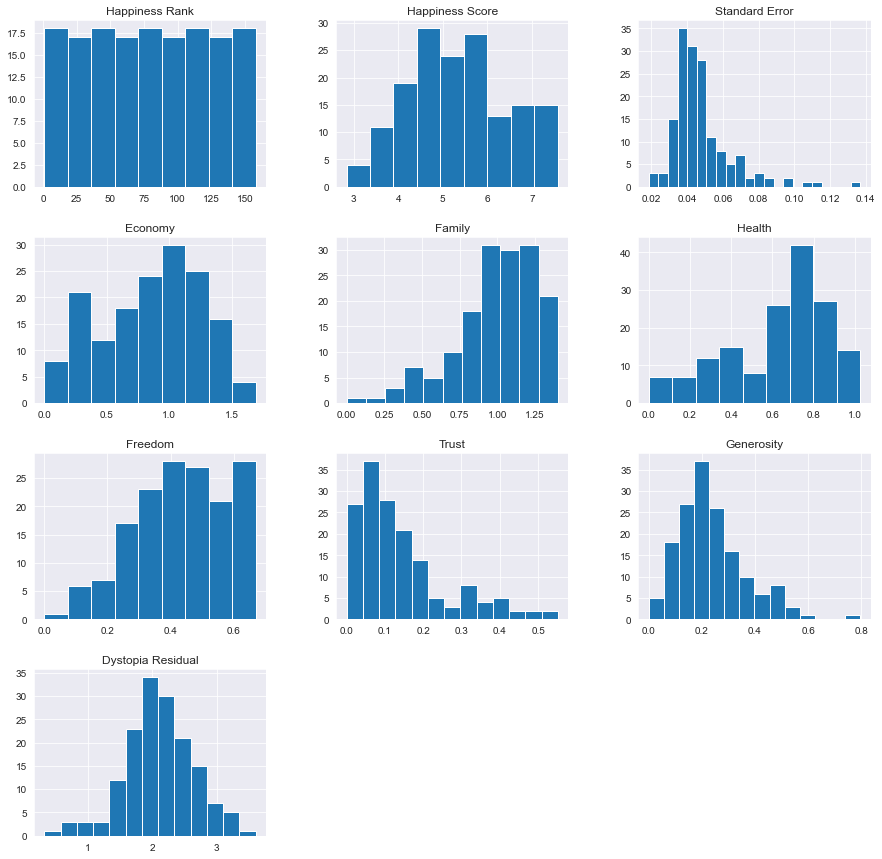

In [11]:
df0.hist(bins='auto', figsize=(15,15))

In [12]:
df1 = df0.drop(['Happiness Rank', 'Standard Error', 'Dystopia Residual'], axis=1)

In [13]:
df1.head()

,Country,Region,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


## using encoder for region column

In [14]:
regions = df1['Region'].unique()

In [15]:
regions_dict = {
    'Western Europe' : 10,
    'North America' : 9,
    'Australia and New Zealand' : 8,
    'Middle East and Northern Africa' : 7,
    'Latin America and Caribbean' : 6,
    'Southeastern Asia' : 5,
    'Central and Eastern Europe' : 4,
    'Eastern Asia' : 3,
    'Sub-Saharan Africa' : 2,
    'Southern Asia' : 1
}

df1['Region'] = df1['Region'].map(regions_dict)
df1.head()

,Country,Region,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Switzerland,10,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,10,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,10,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,10,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,9,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [16]:
df1.columns

Index(['Country', 'Region', 'Happiness Score', 'Economy', 'Family', 'Health',
       'Freedom', 'Trust', 'Generosity'],
      dtype='object')

In [17]:
shuffled_columns =['Country', 'Region', 'Economy', 'Family', 'Health',
       'Freedom', 'Trust', 'Generosity', 'Happiness Score']
df1 = df1[shuffled_columns]

In [18]:
df2 = df1.copy()

## Checking for correlation of data...

<AxesSubplot:>

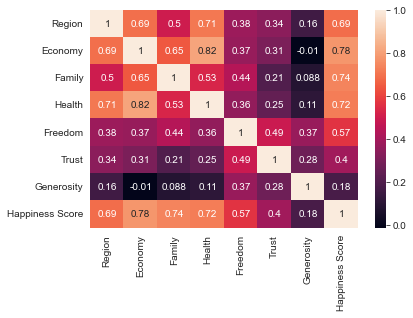

In [19]:
sns.heatmap(df1.drop('Country', axis = 1).corr(), annot=True)

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

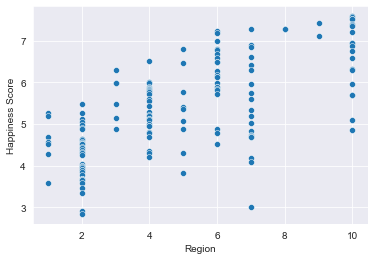

In [28]:
sns.scatterplot(data = df2, x='Region', y='Happiness Score')

<AxesSubplot:xlabel='Economy', ylabel='Happiness Score'>

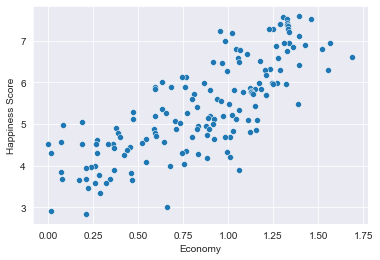

In [20]:
sns.scatterplot(data = df2, x='Economy', y='Happiness Score')

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

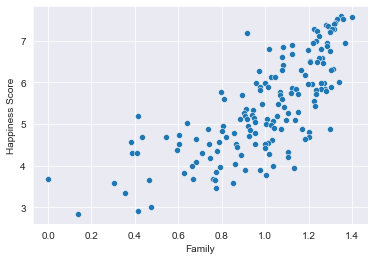

In [21]:
sns.scatterplot(data = df2, x='Family', y='Happiness Score')

<AxesSubplot:xlabel='Health', ylabel='Happiness Score'>

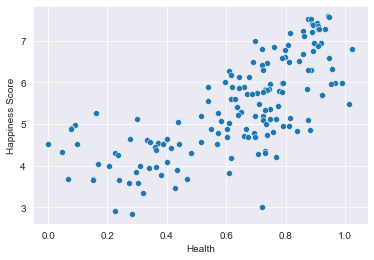

In [22]:
sns.scatterplot(data = df2, x='Health', y='Happiness Score')

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

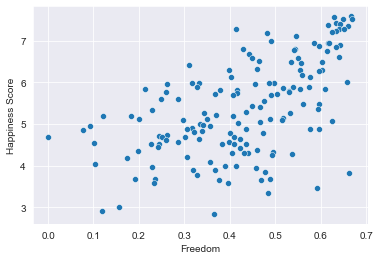

In [23]:
sns.scatterplot(data = df2, x='Freedom', y='Happiness Score')

<AxesSubplot:xlabel='Trust', ylabel='Happiness Score'>

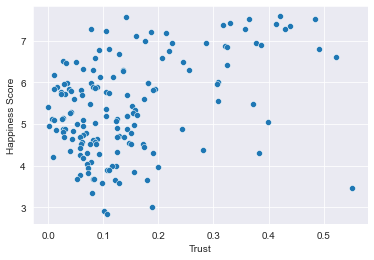

In [24]:
sns.scatterplot(data = df2, x='Trust', y='Happiness Score')

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

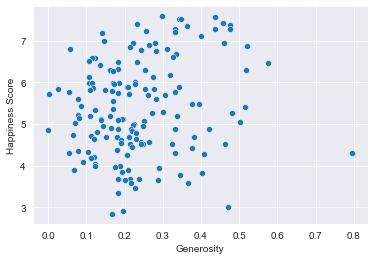

In [25]:
sns.scatterplot(data = df2, x='Generosity', y='Happiness Score')

In [26]:
df2.shape

(158, 9)

## applying train test split, power transformation, Model building & model evaluation...

In [27]:
y = df2['Happiness Score']
x = df2.drop(['Happiness Score', 'Country'], axis=1)

scaler = PowerTransformer()
x1 = scaler.fit_transform(x)
X = pd.DataFrame(x1, index = x.index, columns = x.columns)
Y = y

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=233)
lin_reg = LinearRegression()


lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('r2 score : ', r2_score(y_test, y_pred))
print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('SMSE : ', np.sqrt(mean_squared_error(y_test, y_pred)))


print("-----------")
print("-----------")

print('training score : ', lin_reg.score(x_train, y_train))
print('testing score : ', lin_reg.score(x_test, y_test))

r2 score :  0.9053772342511832
MAE :  0.29596432496098385
MSE :  0.12304161409865731
SMSE :  0.3507728810764272
-----------
-----------
training score :  0.7660662755658978
testing score :  0.9053772342511832


## Conclusion : using simple linear regression with power transformation on feature is a good model to use.